In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Performance setting
os.environ["OMP_NUM_THREADS"] = "1"

# Set dark theme
plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.2)
sns.set_style("darkgrid")


In [6]:
# Load the Mall Customer data
data = pd.read_csv("Mall_Customers.csv")

# Preview the data
print("📦 First 5 rows:")
print(data.head())


📦 First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
# 🔍 Basic Info
print("🔹 Dataset Info:")
print(data.info())

# 🔍 Missing Values
print("\n🔹 Missing Values:")
print(data.isnull().sum())

# 🔍 Summary Statistics
print("\n🔹 Summary Statistics:")
print(data.describe())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

🔹 Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

🔹 Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.2

In [8]:
from IPython.display import display

# Display first few rows
display(data.head())


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

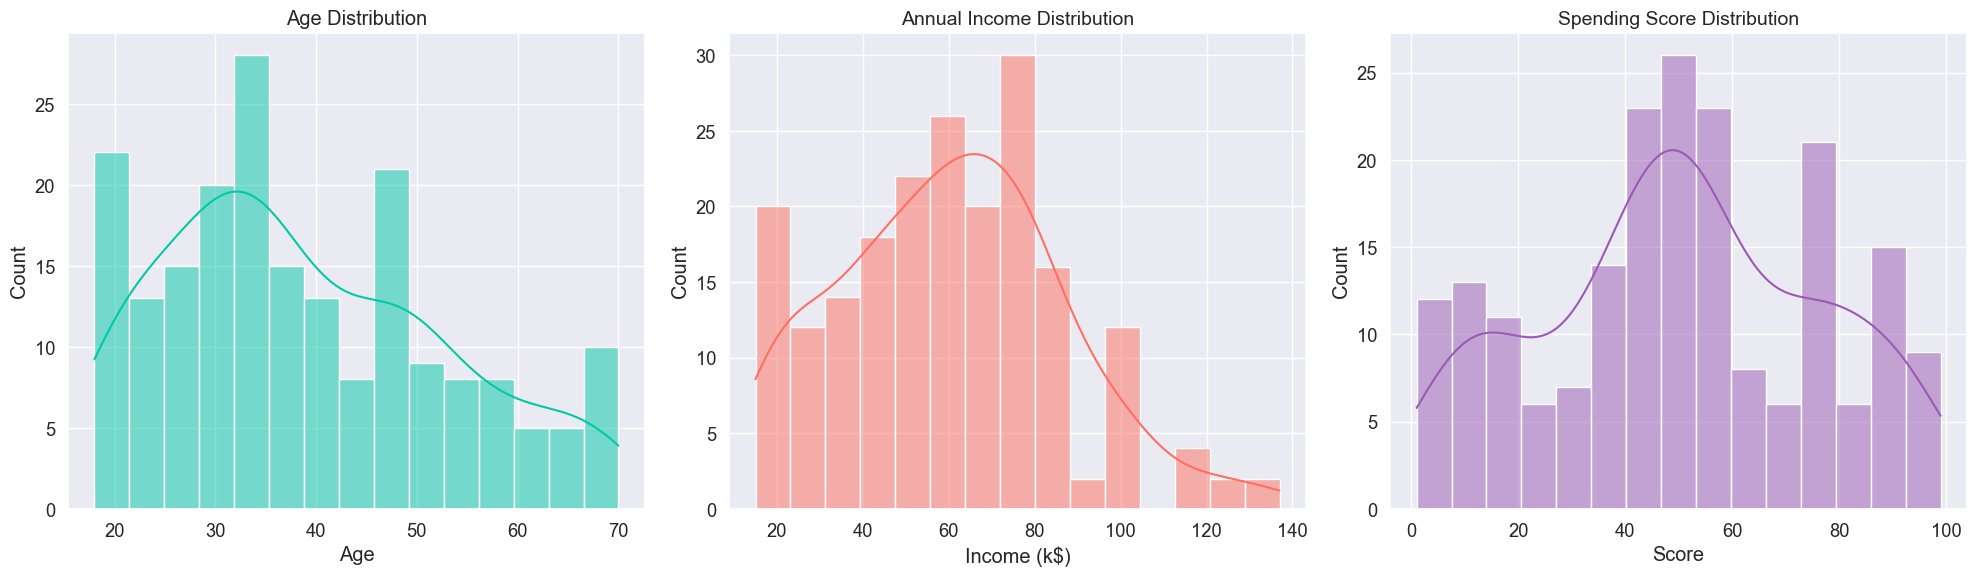

In [11]:
# 📊 Distribution Plots - Dark Style
plt.figure(figsize=(20, 6))

# 🎂 Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=15, kde=True, color='#00C9A7')
plt.title('Age Distribution') 

plt.xlabel('Age')

# 💰 Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='#FF6F61')
plt.title('Annual Income Distribution', fontsize=14)
plt.xlabel('Income (k$)')

# 🛍 Spending Score
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, color='#9B59B6')
plt.title('Spending Score Distribution', fontsize=14)
plt.xlabel('Score')

plt.tight_layout()
plt.show()


In [12]:
# Selecting features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Compute Within-Cluster Sum of Squares (WCSS)
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='#00C9A7')
plt.title('Elbow Method - Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
print("📊 Silhouette Scores:")

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score for k = {k}: {score:.3f}")


📊 Silhouette Scores:
Silhouette Score for k = 2: 0.396
Silhouette Score for k = 3: 0.468
Silhouette Score for k = 4: 0.494
Silhouette Score for k = 5: 0.554
Silhouette Score for k = 6: 0.513
Silhouette Score for k = 7: 0.502
Silhouette Score for k = 8: 0.496
Silhouette Score for k = 9: 0.456
Silhouette Score for k = 10: 0.443


C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [14]:
# Final KMeans model
k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
data['Cluster'] = kmeans.fit_predict(X)


C:\Users\saadp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Dark Scatter Plot for Clusters
plt.figure(figsize=(10, 7))
colors = sns.color_palette('dark', k)

for i in range(k):
    plt.scatter(X[data['Cluster'] == i]['Annual Income (k$)'],
                X[data['Cluster'] == i]['Spending Score (1-100)'],
                s=120, color=colors[i], label=f'Cluster {i}', alpha=0.8, edgecolor='black')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='white', edgecolors='black', marker='X', label='Centroids')

plt.title('Customer Segments: Income vs Spending', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1–100)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [16]:
# Group by Cluster and calculate summary statistics
cluster_profile = data.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': lambda x: x.value_counts().index[0]  # Most common gender
}).round(1)

# Clean up column names
cluster_profile.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in cluster_profile.columns]
cluster_profile = cluster_profile.reset_index()

# Display the profile
print("📋 Cluster Profiling:")
print(cluster_profile)


📋 Cluster Profiling:
   Cluster  Age_mean  Age_min  Age_max  Annual Income (k$)_mean  \
0        0      42.7       18       70                     55.3   
1        1      32.7       27       40                     86.5   
2        2      25.3       18       35                     25.7   
3        3      41.1       19       59                     88.2   
4        4      45.2       19       67                     26.3   

   Annual Income (k$)_min  Annual Income (k$)_max  \
0                      39                      76   
1                      69                     137   
2                      15                      39   
3                      70                     137   
4                      15                      39   

   Spending Score (1-100)_mean  Spending Score (1-100)_min  \
0                         49.5                          34   
1                         82.1                          63   
2                         79.4                          61   
3        